# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

# Easy classification with tensorflow

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import pandas as pd
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

from sklearn.datasets.samples_generator import make_blobs

# Let's generate our dataset for binary classification

In [38]:
Xinput, yinput = make_blobs(n_samples = 1000, centers = 2, n_features = 2)
df = pd.DataFrame(dict(x=Xinput[:,0], y = Xinput[:,1], label = yinput))

In [60]:
Xinput[0:5,]

array([[  6.3590917 ,  -9.42597854],
       [  5.76917507, -10.44342023],
       [  3.0103204 ,  -7.61219536],
       [  7.24211999,  -7.38722636],
       [  7.04302259,  -9.31897903]])

In [84]:
yinput[0:10,]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

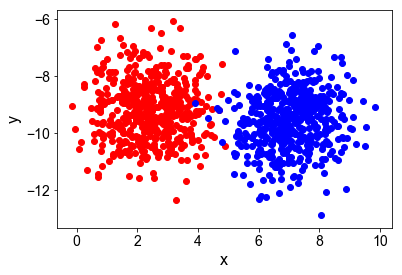

In [39]:
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
plt.scatter(df[yinput==1]['x'], df[yinput==1]['y'], color = 'red')
plt.scatter(df[yinput==0]['x'], df[yinput==0]['y'], color = 'blue')
plt.tick_params(labelsize=14)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.show()

In [178]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [2, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())
W = tf.Variable(tf.random_normal([1, 2]))
#W = tf.Variable(tf.zeros([1, 2]))
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

y_ = tf.sigmoid(tf.matmul(W,X)+b)

# Additional nodes
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

pred = tf.less(y_, 0.5) # We will need this node later during the decision boundary plots

In [179]:
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [180]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 1000 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [181]:
xtrain = Xinput.transpose()
ytrain = yinput.reshape(1,-1)

In [182]:
sess, cost_history = run_logistic_model(learning_r = 0.001, 
                                training_epochs = 10000, 
                                train_obs = xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 3.726384
Reached epoch 1000 cost J = 0.394341
Reached epoch 2000 cost J = 0.232475
Reached epoch 3000 cost J = 0.177764
Reached epoch 4000 cost J = 0.149838
Reached epoch 5000 cost J = 0.132639
Reached epoch 6000 cost J = 0.120858
Reached epoch 7000 cost J = 0.112217
Reached epoch 8000 cost J = 0.105570
Reached epoch 9000 cost J = 0.100275
Reached epoch 10000 cost J = 0.095943


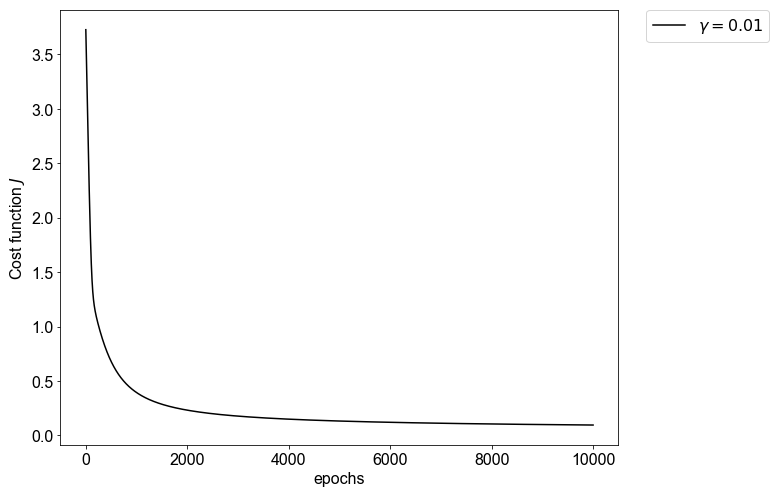

In [183]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black', label = '$\gamma = 0.01$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

In [184]:
print(sess.run(accuracy1, feed_dict={X:xtrain, Y: ytrain, learning_rate: 1e-4}))

0.975


In [185]:
sess, cost_history = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 5000, 
                                train_obs = xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 3.571719
Reached epoch 1000 cost J = 0.094546
Reached epoch 2000 cost J = 0.074911
Reached epoch 3000 cost J = 0.067077
Reached epoch 4000 cost J = 0.062703
Reached epoch 5000 cost J = 0.059855


In [186]:
print(sess.run(accuracy1, feed_dict={X:xtrain, Y: ytrain, learning_rate: 0.05}))

0.975


# Decision Boundary

In [187]:
def make_mesh_predict_tf(h, c1, pred):
    """
    Inputs:
    h -> mesh step (0.001 is a good value of you move between 0 and 1)
    c -> Your training data
    clf -> Your classifier
    
    Outputs:
    xx -> x values of the mesh
    yy -> y values of the mesh
    Z -> The prediction (the color of each point)
    """
    
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = c1[0,:].min() - .2, c1[0,:].max() + .2
    y_min, y_max = c1[1,:].min() - .2, c1[1,:].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    zpred = sess.run(pred, feed_dict={X:np.c_[xx.ravel(), yy.ravel()].T, Y: ytrain, learning_rate: 0.005})
    
    Z = zpred.reshape(xx.shape)
    
    return xx, yy, Z

In [199]:
def print_decision_boundary(xx, yy, Z, X, Y):
    """
    Inputs:
    xx: the values for the mesh (coming from make_mesh_predict())
    yy: the values for the mesh (coming from make_mesh_predict())
    Z: the prediction for each point (that will be mapped to the color)
    X,Y: the training points
    """
    fig = plt.figure(1, figsize=(8, 5))
    plt.pcolormesh(xx, yy, Z, cmap='RdYlBu', alpha = 0.01)  # plt.cm.Paired

    # Plot also the training points
    plt.scatter(X[0,:], X[1,:], c=Y, edgecolors='k',  s= 40, cmap = 'RdYlBu')  # cmap=plt.cm.Paired
    plt.xlabel('$x$', fontsize = 16)
    plt.ylabel('$y$', fontsize = 16)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

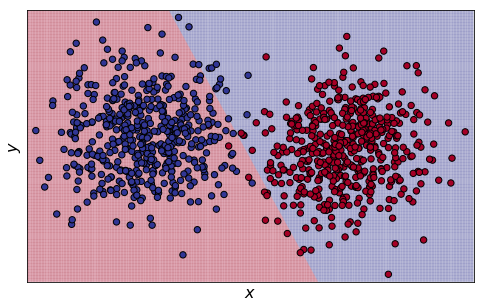

In [200]:
zpred = sess.run(pred, feed_dict={X:xtrain, Y: ytrain, learning_rate: 0.005})

xx, yy, Z = make_mesh_predict_tf(0.005,xtrain , pred)

print_decision_boundary(xx, yy, Z, xtrain, ytrain[0])